In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style','default')
plt.rcParams['figure.figsize'] = (15,3)
plt.rcParams['font.family'] = 'sans-serif'

from pylab import *
import seaborn as sns

In [2]:
#read in all the non retweet data, which means its the original data, and having retweet counts in the retweetCount column
tweets = pd.read_pickle('cleaned_non_retweets.pkl')
tweets[:2]

,text,favorited,favoriteCount,replyToSN,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
created,,,,,,,,,,,,,,,
2016-02-18 19:11:00,"""@ntvuganda: Kizza Besigye has been arrested b...",False,0,0,False,NaN,7.000000e+17,NaN,"<a href=""http://www.twitter.com"" rel=""nofollow...",mashanubian,0,False,False,NaN,NaN
2016-02-18 19:10:00,#MuseveniCanBeSensible if stay away from peopl...,False,0,0,False,NaN,7.000000e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",steve_ke,0,False,False,NaN,NaN


In [3]:
tweets.columns

Index([u'text', u'favorited', u'favoriteCount', u'replyToSN', u'truncated',
       u'replyToSID', u'id', u'replyToUID', u'statusSource', u'screenName',
       u'retweetCount', u'isRetweet', u'retweeted', u'longitude', u'latitude'],
      dtype='object')

In [4]:
#The number of twitter Usernames
len(pd.unique(tweets['screenName'].ravel()))

5021

In [5]:
tweets[tweets['retweetCount'] > 50][:2]

,text,favorited,favoriteCount,replyToSN,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
created,,,,,,,,,,,,,,,
2016-02-18 18:34:00,"You guys, there's a polling station in Kyenger...",False,30,0,False,NaN,7.000000e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",Rukwengye,74,False,False,NaN,NaN
2016-02-18 18:29:00,#UgandaDecides police have sorrounded Imperial...,False,18,0,False,NaN,7.000000e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",Sudhirntv,84,False,False,NaN,NaN


In [6]:
#Get the number of tweets, favorites and retweets

In [7]:
def calculate(x):
    return pd.Series(dict(number_of_tweets = x['text'].count(),
                       retweetCount = x['retweetCount'].sum(),
                       favoriteCount = x['favoriteCount'].sum(),
                       ))

In [8]:
#Do this according to account name

In [9]:
account_count = tweets.groupby('screenName').apply(calculate) 
print len(account_count)
all_accounts = account_count.sort_values('retweetCount', ascending=False)

5021


In [12]:
tweets.to_csv('data_to_get_top_accounts_tweets.csv')

In [10]:
all_accounts[:2]

,favoriteCount,number_of_tweets,retweetCount
screenName,,,
Winnie_Byanyima,768,39,1540
DailyMonitor,436,66,1530


In [11]:
#Top Tweeting accounts

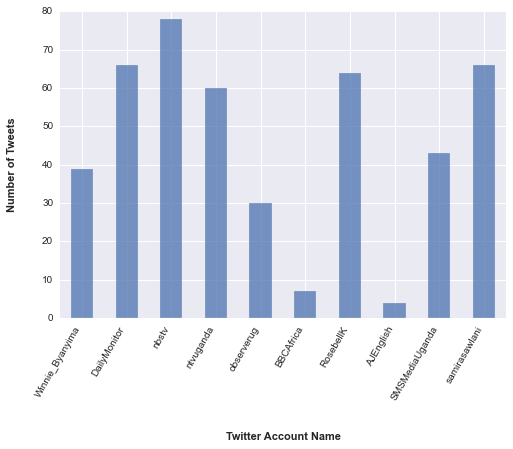

In [12]:
top_accounts_plot = all_accounts['number_of_tweets'][:10].plot(kind='bar', alpha=0.75)
xticks(fontsize = 10,rotation=60, ha ="right")
top_accounts_plot.set_xlabel('Twitter Account Name', weight='bold', labelpad=30)   
top_accounts_plot.set_ylabel('Number of Tweets', weight='bold', labelpad=25) #ADD PADDING TO RIGHT OF Y-AXIS LABEL
savefig('Top account counts - bar graph.png', bbox_inches='tight', dpi=300, format='png')

In [13]:
plt.rcParams['figure.figsize'] = (15,5)

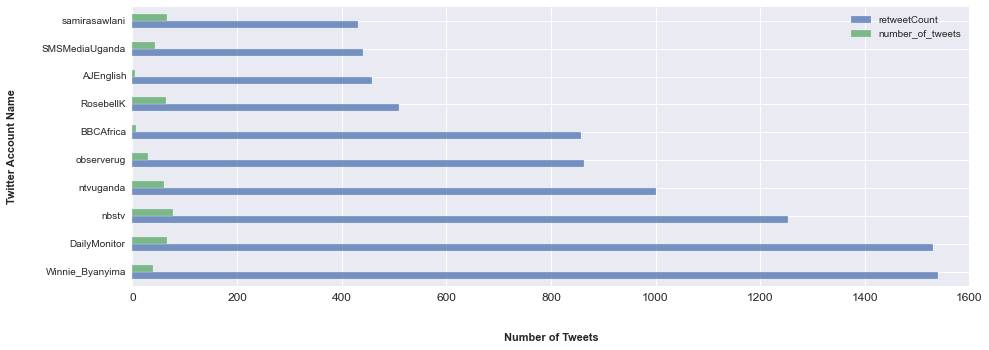

In [14]:
top_accounts_plot = all_accounts[['retweetCount','number_of_tweets']][:10].plot(kind='barh', alpha=0.75)
xticks(fontsize = 12) #,rotation=60, ha ="right")
top_accounts_plot.set_xlabel('Number of Tweets', weight='bold', labelpad=30)   
top_accounts_plot.set_ylabel('Twitter Account Name', weight='bold', labelpad=25) #ADD PADDING TO RIGHT OF Y-AXIS LABEL
savefig('Top account counts - horizontal bar graph2.png', bbox_inches='tight', dpi=300, format='png')